# Chargement data

> ATTENTION : (exécuter environnement Franck OU environnement Nicolas)



Environnement Franck (MacOS local)

In [ ]:
import pandas as pd
# Pour limiter les temps de calcul on travaille uniquement sur les 'nrows' premiers mails
file = "/Users/franckglastre/emaildata_100000_0.csv"
df = pd.read_csv(file, nrows=200)
#df = pd.read_csv("emaildata_100000_0.csv", nrows=200)


Environnement Nicolas (Colab) - Choisir entre :

*   Bloc 1 : Génération d'un fichier csv "aléatoire" à partir du csv initial (479Mo)
*   Bloc 2 : On repart du dernier csv généré pour (par exemple) réexecuter le data cleaning
original (sans doublons)





In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import random

file_path = "/content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/"
file_name = "enron_unique"
file_name_out = "enron_unique_output"
file = file_path+file_name+'.csv'
 #
# CHOISIR entre Bloc 1 et Bloc 2 selon que l'on veut regénérer (Bloc 1) ou pas (Bloc 2) un fichier csv initial
# Enlever ou Mettre en commentaires selon le choix
# Bloc 1 -------------------------------------------------------------------------------------------------
#
#n = sum(1 for line in open(file)) - 1 #number of records in file (excludes header)
#s = 500 #desired sample size
#file_name_out = file_name_out+'_output_'+str(s)
#skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
#df = pd.read_csv(file, skiprows=skip)

# Bloc 2 -------------------------------------------------------------------------------------------------
#
file_name = "enron_output_500"
file_name_out = file_name+'_bis'
file = file_path+file_name+'.csv'


Mounted at /content/drive


In [ ]:
df = pd.read_csv(file)

In [ ]:
df.head()

,Unnamed: 0,date,sender,recipient1,subject,text
0,0,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,"['', 'Here is our forecast', '', ' ']"
1,1,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"['', 'Traveling to have a business meeting tak..."
2,2,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"['', 'test successful. way to go!!!']"
3,3,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,"['', 'Randy,', '', ' Can you send me a schedul..."
4,4,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,"['', ""Let's shoot for Tuesday at 11:45. ""]"


# Modification structures

In [ ]:
print('Fichier de départ : ',file)

df['cc'] = ''                        # pour identfication des personnes en copie
df['NER_header'] = ''                # Spacy NER
df['NER_body'] = ''                  # Spacy NER
df['body_clean'] = ''                # body sans caracteres parasites V1
df['body_principal'] = ''            # mail INITIAL seulement
df['body_dict'] = ''                 # body tokenisé
df['summary_TFIDF'] = ''             # extractive summary by TF-IDF
df['summary_TFIDF_sim'] = ''         # calcul de similarité par rapport à body_clean
df['summary_spacy'] = ''             # extractive summary by Spacy
df['summary_spacy_sim'] = ''         # calcul de similarité par rapport à body_clean
df['summary_BART'] = ''              # abstractive summary by HugginFace/BART
df['summary_BART_sim'] = ''          # calcul de similarité par rapport à body_clean
df['summary_T5'] = ''                # abstractive summary by HugginFace/T5
df['summary_T5_sim'] = ''            # calcul de similarité par rapport à body_clean
df['best_sim'] = ''                  # meilleure taux de similarité par rapport à body_clean

df.tail(10)
deb = 0
fin = df.shape[0]
print(deb,fin)

print(file_name_out)


Fichier de départ :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_output_500.csv
0 500
enron_output_500_bis


# Fonction - Sauvegarde vers CSV

In [ ]:
# SAUVEGARDE en csv du résultat.
def svgd_csv_xls (file_path,file_name):

# to .CSV
  file_extension = ".csv"
  file = file_path+file_name+file_extension
  print("File : ",file)
  df.to_csv(file, encoding='utf-8', index=False)
# df[deb:fin].to_csv(file, encoding='utf-8', index=False)
  print("Svgde effectuée")
  return


# Analyse exploratoire des datas (1)

> Bloc en retrait



In [ ]:
df = df.rename(columns={'sender': 'from', 'recipient1': 'to','subject': 'header', 'text': 'body'})
df.head(5)

,Unnamed: 0,date,from,to,header,body
0,0,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,"['', 'Here is our forecast', '', ' ']"
1,1,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"['', 'Traveling to have a business meeting tak..."
2,2,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"['', 'test successful. way to go!!!']"
3,3,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,"['', 'Randy,', '', ' Can you send me a schedul..."
4,4,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,"['', ""Let's shoot for Tuesday at 11:45. ""]"


In [ ]:
#pas de données quantitatives, pas de renseignement ici....
df.describe()

,Unnamed: 0
count,72932.000000
mean,36465.500000
std,21053.799253
min,0.000000
25%,18232.750000
50%,36465.500000
75%,54698.250000
max,72931.000000


In [ ]:
# identification des valeurs manquantes
# ici, nombreux headers (Sujectà) manquants
info_manq = df.isnull().sum()
print(info_manq)

Unnamed: 0       0
date             0
from             0
to               0
header        4857
body             0
dtype: int64


In [ ]:
# période couverte de la base d'email
df['Datetime']=df['date'].apply(lambda x:x[:10])
df['Datetime'] = pd.to_datetime(df['Datetime'],format="%Y/%m/%d")
print("années: ",df['Datetime'].dt.year.unique())
print("mois: ",df['Datetime'].dt.month.unique())
print("jours: ",df['Datetime'].dt.day.unique())

années:  [2001 2000 1999 1979 2002 2004 2020]
mois:  [ 5 10  8  7  9  4  6  3  2  1 12 11]
jours:  [14  4 18 23 31 22 17 16 13  9  5  3  2 28 26 25 20 19 12 11  8  6  1 30
 29 24 21 15 10  7 27]


In [ ]:
# répartition des emails
print(df.groupby([df['Datetime'].dt.year])['date'].aggregate('count'))
print(df.groupby([df['Datetime'].dt.year,df['Datetime'].dt.month])['date'].aggregate('count'))

Datetime
1979       39
1999      696
2000    30983
2001    37452
2002     3754
2004        6
2020        2
Name: date, dtype: int64
Datetime  Datetime
1979      12            39
1999      4             14
          5             16
          6             18
          7              8
          8             37
          9             52
          10           139
          11           158
          12           254
2000      1            859
          2            949
          3           1134
          4            951
          5           1348
          6           1843
          7           1591
          8           3261
          9           3736
          10          4063
          11          6013
          12          5235
2001      1           3383
          2           3295
          3           2877
          4           4227
          5           4229
          6           1506
          7           2263
          8           1424
          9           1993
          10

# Fonction : selection de l'email INITIAL

In [ ]:
# fonction pour sélectionner uniquement l'email principal, et éliminer les forwards suivants

def sel_email_principal(df):
    import re
    result = re.finditer(r'\'-+ Forwarded by.{,700}Subject:', df)
    # print all match object
    deb=0
    fin=0
    texte=""
    liste=[]
    for match_obj in result:
        liste.append(match_obj.span())
    if len(liste)==0:
        return df
    if len(liste)==1:
        deb=int(liste[0][0])
        fin=int(liste[0][1])
        return df[fin:]
    if len(liste)>1:
        fin=int(liste[0][1])
        deb=int(liste[1][0])
        return df[fin:deb]

Execution : selection email initial

In [ ]:
# création d'un colonne email uniquement avec l'email principal

df['body_principal'] = df['body'].apply(lambda d:sel_email_principal(d))
df.head()
df[['date','body','body_principal']].head(14)

,date,body,body_principal
0,2001-05-14 16:39:00-07:00,"['', 'Here is our forecast', '', ' ']","['', 'Here is our forecast', '', ' ']"
1,2001-05-04 13:51:00-07:00,"['', 'Traveling to have a business meeting tak...","['', 'Traveling to have a business meeting tak..."
2,2000-10-18 03:00:00-07:00,"['', 'test successful. way to go!!!']","['', 'test successful. way to go!!!']"
3,2000-10-23 06:13:00-07:00,"['', 'Randy,', '', ' Can you send me a schedul...","['', 'Randy,', '', ' Can you send me a schedul..."
4,2000-08-31 05:07:00-07:00,"['', ""Let's shoot for Tuesday at 11:45. ""]","['', ""Let's shoot for Tuesday at 11:45. ""]"
5,2000-08-31 04:17:00-07:00,"['', 'Greg,', '', ' How about either next Tues...","['', 'Greg,', '', ' How about either next Tues..."
6,2000-08-22 07:44:00-07:00,"['', 'Please cc the following distribution lis...","['', 'Please cc the following distribution lis..."
7,2000-07-14 06:59:00-07:00,"['', 'any morning between 10 and 11:30']","['', 'any morning between 10 and 11:30']"
8,2000-10-17 02:26:00-07:00,"['', '1. login: pallen pw: ke9davis', '', "" I...","['', '1. login: pallen pw: ke9davis', '', "" I..."
9,2000-10-16 06:44:00-07:00,"['', '---------------------- Forwarded by Phil...",FW: fixed forward or other Collar floor gas p...


# Data Cleaning

Fonction : regex

In [ ]:

# préparation du corpus de mots avec fonction de nettoyage
# prend une string / retourne une string

import re
def data_cleanstr(string):
    r = re.compile(r'[a-zA-Z0-9.-]*@[a-zA-Z0-9.-]*')
    tok=r.sub('mail', string)
    
    r = re.compile(r"([^a-zA-Z\.$]+)")
    tok1=r.sub(' ', tok)
    return tok1
    



Execution Regex

In [ ]:
df['body_principal'] = df['body_principal'].apply(lambda d:data_cleanstr(d))


In [ ]:
print(df.iloc[9,]['body'])
print("   ")
print(df.iloc[9,]['body_principal'])


['', '---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/16/2000 ', '01:42 PM ---------------------------', '', '', '"Buckner, Buck" <buck.buckner@honeywell.com> on 10/12/2000 01:12:21 PM', 'To: "\'Pallen@Enron.com\'" <Pallen@Enron.com>', 'cc:  ', 'Subject: FW: fixed forward or other Collar floor gas price terms', '', '', 'Phillip,', '', '> As discussed  during our phone conversation, In a Parallon 75 microturbine', '> power generation deal for a national accounts customer, I am developing a', '> proposal to sell power to customer at fixed or collar/floor price. To do', '> so I need a corresponding term gas price for same. Microturbine is an', '> onsite generation product developed by Honeywell to generate electricity', '> on customer site (degen). using natural gas. In doing so,  I need your', '> best fixed price forward gas price deal for 1, 3, 5, 7 and 10 years for', '> annual/seasonal supply to microturbines to generate fixed kWh for', "> customer. We have the opport

Fonction : StopWords

In [ ]:
# préparation fonction stopwords
# prend une string / retourne une string


def remove_stop_words(text):
    import spacy
    from spacy.lang.en.stop_words import STOP_WORDS
    stopwords=list(STOP_WORDS)
    lst=[]

    for token in text.split():
        if token.lower() not in stopwords:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
            result = ' '.join(lst)
    return result

Fonction : Tokenisation et lower()

In [ ]:


# tokenisation du corpus de mots, utilisation de la fonction de nettoyage et mise en minuscules
# prend retourne un dataframe / retourne une liste

import nltk
nltk.download('punkt')

def tokenize_mots(df):    
    texte=[]
    phrases=""
    from nltk.tokenize import word_tokenize

    for i in df['body_principal']:
        phrases+=i  
    a=data_cleanstr(str(phrases))
    mots=word_tokenize(a)
    mots=[i.lower() for i in mots]
    return mots



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


21282962
13907338


Execution : Tokenisation et lower() 

In [ ]:
# création liste mots pour corpus
mots=tokenize_mots(df)



Execution StopWords

In [ ]:
# création liste mots pour corpus sans Stopwords
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)
mots_sans=[]
for mot in mots:
    if mot not in stopwords:
        mots_sans.append(mot)
    

print(len(mots))
print(len(mots_sans))

Fonction : Lemmatization

In [ ]:
# lematisation du corpus, 2 ere ligne à réactiver si besoin
# prend une liste / retourne une liste

import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

def lematize_mots(corpus):
    from nltk.stem import WordNetLemmatizer

    # Initialiser un lemmatiseur
    wordnet_lemmatizer = WordNetLemmatizer()

    #Calculer le lemme du mot meeting
    corp=[]
    for mot in corpus:
        a=""
        a=wordnet_lemmatizer.lemmatize(mot)
        corp.append(a)
    #utilisation de list(set()) pour supprimer les doublons
    return list(set(corp))




[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/franckglastre/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


227317
227100


Execution : Lemmatization

In [ ]:
# création liste pour corpus
corpus=lematize_mots(mots)
corpus_sans=lematize_mots(mots_sans)

print(len(corpus))
print(len(corpus_sans))

Fonction : suppression des Noms de personnes (NER Spacy)

In [ ]:
# fonction pour enlever les noms
#Entrée liste / Sortie liste

def remove_nom(corpus):
    import spacy
    # mise en minuscule du texte
    text=[t.lower() for t in corpus]
    # création d'un string pour préparation spacy
    text=" ".join(text)
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    # création d'une liste de nom sur la base des NER Person de Spacy
    personne = [e.text for e in doc.ents if e.label_=='PERSON']
    lst=[]
    # parcours du texte issu de doc pour neutraliser les Persons
    texte=[token.text for token in doc]
    for token in texte:
        if token not in personne:    #checking whether the word is not 
            lst.append(token)                    #present in the stopword list.      
    return lst



     


Execution : suppression des Noms de personnes (NER Spacy)

In [ ]:
corpus_sans=remove_nom(corpus_sans)    

# Vectorization

1.   CountVectorizer



In [ ]:
# vectorisation du corpus de mots
# retourne un dictionnaire

def bagofwords(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # Créer un vectorisateur
    vectorizer = CountVectorizer()

    # Appliquer Bag of words à la variable tokens
    vectorizer.fit_transform(corpus).todense()

    # Récupération des tokens


    return vectorizer

# version avec stop_Words
vectorizer=bagofwords(corpus)
tokenized = vectorizer.vocabulary_
token=dict(sorted(tokenized.items(),key= lambda x:x[1],reverse=True))

# version sans stop_Words
vectorizer_sans=bagofwords(corpus_sans)
tokenized_sans = vectorizer_sans.vocabulary_
token_sans=dict(sorted(tokenized_sans.items(),key= lambda x:x[1],reverse=True))
print(token_sans)

# neutralisation nom



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Vizualisation (WordCloud)

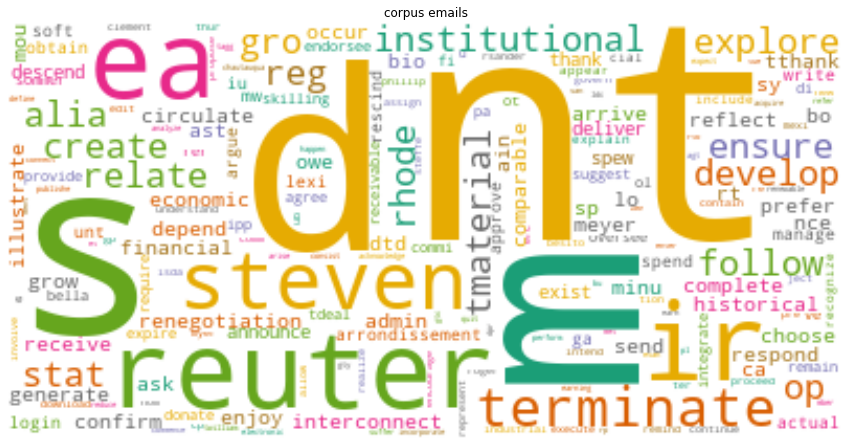

In [ ]:
#visualisation nuage
from wordcloud import WordCloud, STOPWORDS

stop_words = STOPWORDS
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
wc.generate(" ".join(corpus_sans))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.title("corpus emails")
    
plt.show()

# Analyse exploratoire des datas (2)

In [ ]:
df.head(5)

,Unnamed: 0,date,from,to,header,body,Datetime,body_principal
0,0,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,"['', 'Here is our forecast', '', ' ']",2001-05-14,Here is our forecast
1,1,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"['', 'Traveling to have a business meeting tak...",2001-05-04,Traveling to have a business meeting takes th...
2,2,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"['', 'test successful. way to go!!!']",2000-10-18,test successful. way to go
3,3,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,"['', 'Randy,', '', ' Can you send me a schedul...",2000-10-23,Randy Can you send me a schedule of the salar...
4,4,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,"['', ""Let's shoot for Tuesday at 11:45. ""]",2000-08-31,Let s shoot for Tuesday at .


,Unnamed: 0,longueur_body
count,72932.000000,7.293200e+04
mean,36465.500000,1.596576e+03
std,21053.799253,8.385275e+03
min,0.000000,1.000000e+00
25%,18232.750000,2.240000e+02
50%,36465.500000,6.120000e+02
75%,54698.250000,1.487000e+03
max,72931.000000,1.984382e+06


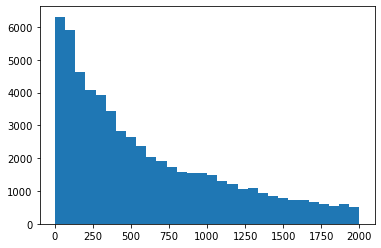

In [ ]:
import matplotlib.pyplot as plt
# distribution longueur d'emails
df['longueur_body']=df['body_principal'].apply(lambda x:len(x))
# distribution de la longueur des emails
plt.hist(df[df['longueur_body']<2000]['longueur_body'],bins=30);
# statistique sur la longueur des emails
df.describe()  

In [ ]:
df[df['longueur_body']>2000]['body_principal'].count()
df[df['longueur_body']>2000]['body_principal'].head(1)

3    ['X-FileName: JARNOLD (Non-Privileged).pst', '...
Name: body_principal, dtype: object

In [ ]:
# distribution des emails par auteur
print(df["from"].value_counts())
print("  ")
print("nombre de correspondants :",len(df["from"].unique()))

jeff.dasovich@enron.com       7701
eric.bass@enron.com           4365
sally.beck@enron.com          3950
john.arnold@enron.com         3469
david.delainey@enron.com      2699
                              ... 
deborah.heath@enron.com          1
kristin.stathis@enron.com        1
paul.manning@honeywell.com       1
mreed@beckson.com                1
5rzbqjiyp@homebiz.com            1
Name: from, Length: 4591, dtype: int64
  
nombre de correspondants : 4591


In [ ]:
# distribution des emails par destinataire
df["to"].value_counts()

jeff.dasovich@enron.com     4487
sally.beck@enron.com        2958
jdasovic@enron.com          1131
don.baughman@enron.com       948
lcampbel@enron.com           795
                            ... 
kari.oquinn@enron.com          1
lgibson@ogwb.com               1
slimpme@aol.com                1
rkrumme@austin.rr.com          1
richard.pinion@enron.com       1
Name: to, Length: 4854, dtype: int64

In [ ]:
# sujets d'email identique?
print(df["header"].value_counts())
print("nombre de NA :",df["header"].isna().sum()," sur tot de",len(df))

Re:                                      1663
RE:                                      1227
"Datek Online execution report"           186
FW:                                       149
RIGZONE Industry News                     106
                                         ... 
employment contracts                        1
Telephone Message - Jesus Melendrez         1
Dell, Arkansas ULP Position Statement       1
Enron payments                              1
Re: Evergreen deals                         1
Name: header, Length: 27086, dtype: int64
nombre de NA : 4857  sur tot de 72932


In [ ]:
svgd_csv_xls (file_path,file_name_out)

File :  /content/drive/MyDrive/Datascientest/Projet PY_email Datascientest/Data/Enron Cleaned Data/enron_output_500_bis.csv
Svgde effectuée
